In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet, imagenet_utils
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras import preprocessing 
from tensorflow.keras.preprocessing import image
tf.keras.utils.load_img
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from pprint import pprint

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


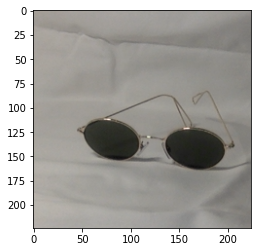

In [3]:
# showing the original image
img = load_img("/content/drive/MyDrive/images2/sunglasses/21-55-02-198741.png")
plt.imshow(img)
plt.show()

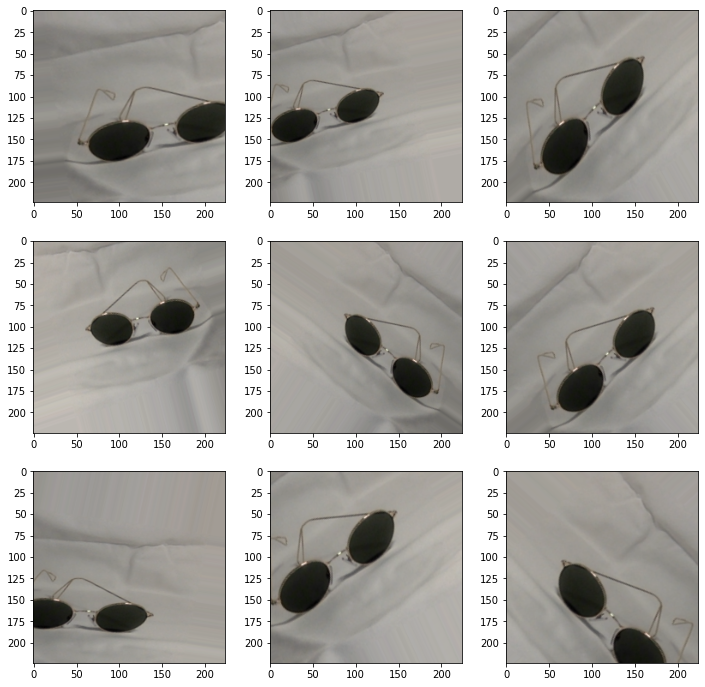

In [4]:
#plotting the generated images
imgs = os.listdir('/content/drive/MyDrive/images3/preview/')

_, axs = plt.subplots(3, 3, figsize=(12, 12))
axs = axs.flatten()
for img, ax in zip(imgs, axs):
    img = plt.imread('/content/drive/MyDrive/images3/preview/' + img)
    ax.imshow(img)

plt.show()

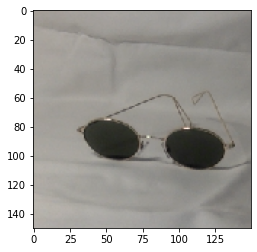

1/1 [==============================] - 0s 110ms/step


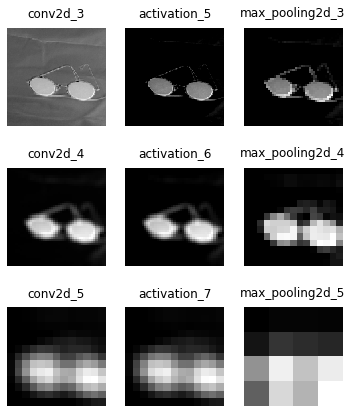

In [25]:
model = keras.models.load_model('/content/drive/MyDrive/first_try.h5')

img_path = '/content/drive/MyDrive/images2/sunglasses/21-55-02-198741.png'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

layer_outputs = [layer.output for layer in model.layers[:9]]
layer_names = [layer.name for layer in model.layers[:9]]
# Extracts the outputs of the top 9 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(img_tensor)

fig = plt.figure()
for i in range(len(activations)):
    activation = activations[i]
    ax = fig.add_subplot(3, 3, i+1)
    ax.set_title(layer_names[i])
    ax.matshow(activation[0, :, :, 0], cmap='gray')
    plt.subplots_adjust(top=1.5)
    ax.axis("off")
plt.show()

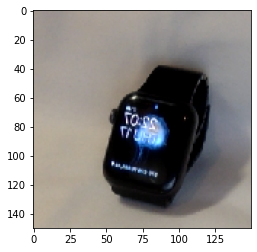

1/1 [==============================] - 0s 114ms/step


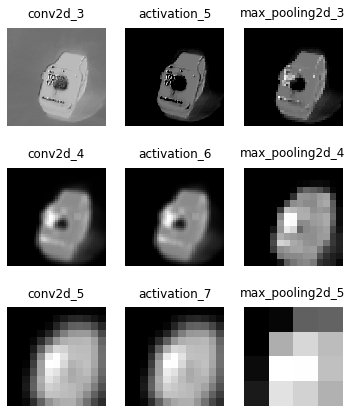

In [26]:
img_path = '/content/drive/MyDrive/images2/watch/22-07-16-177506.png'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()

layer_outputs = [layer.output for layer in model.layers[:9]]
layer_names = [layer.name for layer in model.layers[:9]]
# Extracts the outputs of the top 9 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

activations = activation_model.predict(img_tensor)

fig = plt.figure()
for i in range(len(activations)):
    activation = activations[i]
    ax = fig.add_subplot(3, 3, i+1)
    ax.set_title(layer_names[i])
    ax.matshow(activation[0, :, :, 0], cmap='gray')
    plt.subplots_adjust(top=1.5)
    ax.axis("off")
plt.show()

#### Test on the data

In [5]:
classes = ['sunglasses', 'empty', 'watch']
base_path = '/content/drive/MyDrive/images2/'

In [6]:
# ImageDataGenerator from Keras
datagen = ImageDataGenerator(preprocessing_function=mobilenet_v2.preprocess_input,
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [7]:
# generating 10 images
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='/content/drive/MyDrive/images3/preview',
                          save_prefix="sunglasses", save_format="png"):
    i += 1
    if i >= 10:
        break

In [8]:
# a generator that returns batches of X and y arrays
train_datagen = datagen.flow_from_directory(
        directory=base_path,
        class_mode="categorical",
        classes=classes,
        batch_size=150,
        target_size=(224, 224)
)

Found 342 images belonging to 3 classes.


In [9]:
# load all images 
Xtrain, ytrain = next(train_datagen)
Xtrain.shape, ytrain.shape

((150, 224, 224, 3), (150, 3))

In [10]:
classes

['sunglasses', 'empty', 'watch']

In [11]:
model_mobnet = mobilenet_v2.MobileNetV2(
    weights='imagenet', 
    alpha=0.5,         
    pooling=None,      
    include_top=False,  
    input_shape=(224, 224, 3)
)

3201480/3201480 [==============================] - 0s 0us/step


In [12]:
model_mobnet.trainable = False

In [13]:
#CNN MODEL
model = Sequential()
model.add(model_mobnet)
model.add(Activation('relu'))
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes)))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_0.50_224 (Funct  (None, 7, 7, 1280)       706224    
 ional)                                                          
                                                                 
 activation (Activation)     (None, 7, 7, 1280)        0         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 64)                4014144   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [14]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.categorical_crossentropy,
              metrics=[keras.metrics.categorical_accuracy])

In [15]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [16]:
model.fit(Xtrain, ytrain, 
          epochs=30, 
          verbose=2,
          batch_size=100, 
          callbacks=[callback],
          validation_split=0.25)

Epoch 1/30
2/2 - 11s - loss: 1.2596 - categorical_accuracy: 0.4375 - val_loss: 0.0445 - val_categorical_accuracy: 0.9737 - 11s/epoch - 6s/step
Epoch 2/30
2/2 - 3s - loss: 0.3427 - categorical_accuracy: 0.9554 - val_loss: 0.5889 - val_categorical_accuracy: 0.8947 - 3s/epoch - 1s/step
Epoch 3/30
2/2 - 4s - loss: 0.3795 - categorical_accuracy: 0.9732 - val_loss: 3.1371e-08 - val_categorical_accuracy: 1.0000 - 4s/epoch - 2s/step
Epoch 4/30
2/2 - 3s - loss: 0.0025 - categorical_accuracy: 1.0000 - val_loss: 9.7875e-07 - val_categorical_accuracy: 1.0000 - 3s/epoch - 2s/step
Epoch 5/30
2/2 - 3s - loss: 1.9370e-04 - categorical_accuracy: 1.0000 - val_loss: 1.8295e-05 - val_categorical_accuracy: 1.0000 - 3s/epoch - 1s/step
Epoch 6/30
2/2 - 3s - loss: 2.5035e-05 - categorical_accuracy: 1.0000 - val_loss: 2.0313e-04 - val_categorical_accuracy: 1.0000 - 3s/epoch - 1s/step


Test model with ImageGenerator

In [17]:
img_path = '/content/drive/MyDrive/images2/sunglasses/21-55-02-198741.png'
img_sungl = image.load_img(img_path, target_size=(224, 224))
img_sungl = image.img_to_array(img_sungl)
img_sungl = np.expand_dims(img_sungl, axis=0)
img_sungl /= 255.

img_path1 = '/content/drive/MyDrive/images2/watch/22-08-42-654383.png'
img_watch = image.load_img(img_path1, target_size=(224, 224))
img_watch = image.img_to_array(img_watch)
img_watch = np.expand_dims(img_watch, axis=0)
img_watch /= 255.

img_path2 = '/content/drive/MyDrive/images2/empty/22-10-29-235416.png'
img_empty = image.load_img(img_path2, target_size=(224, 224))
img_empty = image.img_to_array(img_empty)
img_empty = np.expand_dims(img_empty, axis=0)
img_empty /= 255.


In [18]:
model.predict(img_sungl)
a=model.predict(img_sungl)[0].round(decimals = 3)

1/1 [==============================] - 0s 49ms/step


In [19]:
model.predict(img_watch)
b=model.predict(img_watch)[0].round(decimals = 3)

1/1 [==============================] - 0s 90ms/step


In [20]:
model.predict(img_empty)
c=model.predict(img_empty)[0].round(decimals = 3)

1/1 [==============================] - 0s 46ms/step


In [21]:
classes

['sunglasses', 'empty', 'watch']

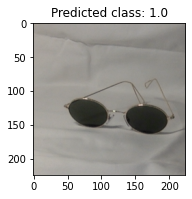

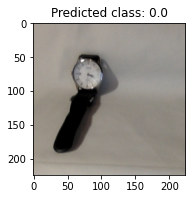

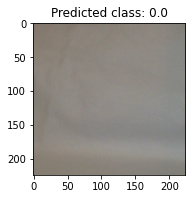

In [22]:
plt.figure()
plt.subplot(121)
plt.title("Predicted class: " + str(a[0]))
plt.imshow(img_sungl[0])
plt.show()

plt.subplot(122)
plt.title("Predicted class: " + str(b[0]))
plt.imshow(img_watch[0])
plt.show()

plt.subplot(122)
plt.title("Predicted class: " + str(c[0]))
plt.imshow(img_empty[0])
plt.show()